## Life Exectancy 1800 - 2016

Within this notebook, I will be analysing the average life expectancy since 1800 - 2016.

I will:
- Visualise the changes and fluctuations in life expectancy throughout history.
- I will aim to contextualise any anomalies from the trend.
- Compare the wealthiest and poorest nations in terms of life expenctancy. Find a trend whether higher GDP nations lead to a better quality of life. 
- Compare the top 3 nations of each continent (GDP), and compare the life expectancy over each continent.  

#### Set-up

In [253]:
#Import Libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as mpy
import seaborn as sns
import numpy as np
import time
import datetime as dt

In [286]:
#Import data
ledb = pd.read_csv("D:\PROJECTS\Life Expectancy 1800 - 2016 ✔\indicator-life_expectancy_at_birth ORIGINAL.csv")
ledb_comp = pd.read_csv("D:\PROJECTS\Life Expectancy 1800 - 2016 ✔\life-expectancy - global ORIGINAL.csv")

In [287]:
ledb

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
ledb_comp

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


In [289]:
cols = ledb_comp.columns
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

In [290]:
countries = ledb_comp.Entity.unique()
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equ

The country index above shows that there are spaces within some of the values. I will need to replace the spaces with; _
This is to make sure that the values are callable in future analysis. 
This will only be necessary if I will be analysing any countries that require manipulation.

#### Data Manipulation/Cleaning

In [291]:
##Check for null values
ledb.isnull().sum()

country     0
1800       59
1801       59
1802       59
1803       59
           ..
2012       52
2013       52
2014       52
2015       52
2016       52
Length: 218, dtype: int64

In [292]:
##Fill null values
ledb_na = ledb.fillna('-')
ledb_na

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,76.6,76.8,77,77.2,77.4,77.5,77.7,77.9,78,78.1
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76,76.1,76.2,76.3,76.3,76.4,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
256,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,49,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.1
257,Zimbabwe,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,...,46.4,47.3,48,49.1,51.6,54.2,55.7,57,59.3,61.69
258,Åland,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [293]:
##Extract mean life expectancy per year for visualisation of the global life expectancy growth
avg_global = ledb.describe()
avg_global = avg_global.loc[['mean']]

#Convert table into an array
avg_global = np.array(avg_global)

In [294]:
##Sum null value count in 2nd dataset
ledb_comp.isnull().sum()

Entity               0
Code               583
Year                 0
Life expectancy      0
dtype: int64

In [295]:
##Fill null values 
ledb_comp = ledb_comp.fillna('N/A')

In [296]:
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

In [297]:
##Rename column names 
ledb_comp.rename(columns={'Life expectancy': 'Life_expectancy'}, inplace=True)

In [298]:
ledb_comp

,Entity,Code,Year,Life_expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


### Data Visualisation

In [299]:
##Summarise quantitative values
ledb.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


#### Global life expectancy 1800 - 2016

In [300]:
x = np.arange(2017)
years = x[1800:2017]

In [301]:
avg_global

array([[31.4860199 , 31.44890547, 31.46348259, 31.37741294, 31.44631841,
        31.56253731, 31.61597015, 31.57313433, 31.37676617, 31.31044776,
        31.52174129, 31.48189055, 31.47273632, 31.46721393, 31.51631841,
        31.64741294, 31.62751244, 31.72154229, 31.57472637, 31.48860697,
        31.56079602, 31.62059701, 31.72208955, 31.77064677, 31.70900498,
        31.66681592, 31.59731343, 31.63358209, 31.5778607 , 31.55995025,
        31.6400995 , 31.60477612, 31.56920398, 31.56432836, 31.55199005,
        31.67442786, 31.64069652, 31.58064677, 31.64129353, 31.63174129,
        31.71422886, 31.72960199, 31.7341791 , 31.71910448, 31.77810945,
        31.82547264, 31.54716418, 31.61900498, 31.61671642, 31.46606965,
        31.63572139, 31.77298507, 31.7858209 , 31.78462687, 31.57308458,
        31.70472637, 31.71626866, 31.71825871, 31.72353234, 31.69313433,
        31.76572139, 31.73427861, 31.67059701, 31.72154229, 31.65477612,
        31.61537313, 31.50114428, 31.50950249, 31.2

In [302]:
avg_global.shape

(1, 217)

In [303]:
global_le = np.array([31.4860199 , 31.44890547, 31.46348259, 31.37741294, 31.44631841,
        31.56253731, 31.61597015, 31.57313433, 31.37676617, 31.31044776,
        31.52174129, 31.48189055, 31.47273632, 31.46721393, 31.51631841,
        31.64741294, 31.62751244, 31.72154229, 31.57472637, 31.48860697,
        31.56079602, 31.62059701, 31.72208955, 31.77064677, 31.70900498,
        31.66681592, 31.59731343, 31.63358209, 31.5778607 , 31.55995025,
        31.6400995 , 31.60477612, 31.56920398, 31.56432836, 31.55199005,
        31.67442786, 31.64069652, 31.58064677, 31.64129353, 31.63174129,
        31.71422886, 31.72960199, 31.7341791 , 31.71910448, 31.77810945,
        31.82547264, 31.54716418, 31.61900498, 31.61671642, 31.46606965,
        31.63572139, 31.77298507, 31.7858209 , 31.78462687, 31.57308458,
        31.70472637, 31.71626866, 31.71825871, 31.72353234, 31.69313433,
        31.76572139, 31.73427861, 31.67059701, 31.72154229, 31.65477612,
        31.61537313, 31.50114428, 31.50950249, 31.25278607, 31.55179104,
        31.7739801 , 31.71069652, 31.7818408 , 31.85079602, 31.89512438,
        31.77562189, 31.95457711, 32.02059701, 31.96706468, 32.12542289,
        32.1160199 , 32.16298507, 32.10303483, 32.2379602 , 32.36711443,
        32.41761194, 32.46328358, 32.50457711, 32.53004975, 32.51114428,
        32.29104478, 32.47537313, 32.47840796, 32.53308458, 32.74721393,
        32.8118408 , 32.89522388, 32.96427861, 32.9940796 , 32.96298507,
        33.01338308, 33.18024876, 33.25567164, 33.26746269, 33.31104478,
        33.34810945, 33.4561194 , 33.56616915, 33.66716418, 33.89875622,
        34.03502488, 34.1379602 , 34.33437811, 34.34258706, 34.08069652,
        33.71631841, 33.81412935, 33.66228856, 22.2921393 , 33.769801  ,
        33.97532338, 34.43004975, 34.77472637, 35.47875622, 35.76895522,
        35.94393035, 36.35378109, 36.55079602, 36.88109453, 36.92855721,
        37.40895522, 37.41766169, 37.44039801, 37.270199  , 38.72363184,
        39.11462687, 39.59726368, 39.91860697, 40.44293532, 40.91283582,
        40.90089552, 39.60940299, 39.49726368, 39.33741294, 39.12497512,
        40.94522388, 44.31641791, 44.87860697, 46.94870647, 48.06383085,
        49.25975248, 49.50851485, 50.15594059, 50.82287129, 51.51064356,
        52.10415842, 52.65415842, 53.13054455, 53.74242574, 54.18747525,
        54.73282178, 55.2420297 , 55.69584158, 56.2150495 , 56.73742574,
        57.13509901, 57.57252475, 58.01762376, 58.39044554, 58.75915842,
        59.23856436, 59.67975248, 60.10425743, 60.48391089, 60.87163366,
        61.19965347, 61.61168317, 62.03108911, 62.42      , 62.83029703,
        63.22044554, 63.65777228, 64.08361386, 64.44564356, 64.81445545,
        65.13168317, 65.54579208, 65.86806931, 66.14440594, 66.40247525,
        66.78461538, 66.84466346, 67.026875  , 67.0925    , 67.00610577,
        67.22      , 67.41240385, 67.62354067, 67.7623445 , 67.93488038,
        68.07770335, 68.43794258, 68.65325359, 68.93555024, 69.18421053,
        69.52401914, 69.85019048, 70.13971154, 70.44716346, 70.76774038,
        70.96990385, 71.324375  , 71.66307692, 71.91610577, 72.088125  ,
        72.32100962, 72.55663462])

In [304]:
years.shape

(217,)

In [305]:
global_le.shape

(217,)

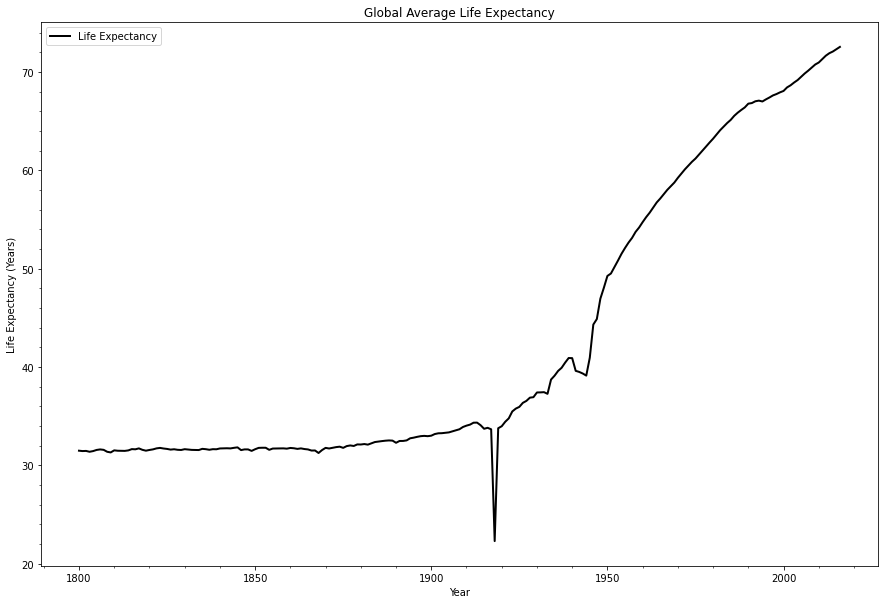

In [306]:
#Provide values
glb_xvalues = years
glb_yvalues = global_le
#Set Size
mpy.figure(figsize=(15,10))


#Plot Data 
global_le = mpy.plot(glb_xvalues, glb_yvalues, linewidth = 2, color= 'black')

mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy')
mpy.legend(['Life Expectancy'], ncol=1, loc='upper left')

The graph above represents the life expectancy from 1800 - 2016.

We can infer that the general trend is that the average life expectancy is growing, due to improved medicine, better common hygiene, quality of food, quality of water, better housing and more. 

The Spanish Flu was responsible for the steep decline, taking the lives of ~50 million people over its reign of carnage. 

From 1918 - 1920, there is an extreme outlier from the trend. The average life expectancy dropped drastically, from ~34  in 1917, dropping to ~23 in the trough of the decline. The Spanish Flu was accountable for the steep decline, taking the lives of ~50 million people and infecting ~500 million people, from 1918 - 1920.

The decline recovered in 1920 and continued the general up-trend.

### How do the wealthiest nations compare to the poorest? Does GDP/Wealth indicate higher life expectancy?

I will compare the life expectancies top 5 wealthies and poorest nations (relative to GDP per capita)
Top 5 Wealthiest Nations:
1. Luxembourg (GDP per capita: $119,719)

2. Norway (GDP per capita: $86,362)

3. Switzerland (GDP per capita: $83,832)

4. Ireland (GDP per capita: $81,477)

5. Iceland (GDP per capita: $78,181)

Top 5 Poorest Nations: 
1. Democratic Republic of Congo (GDP per capita: $500)

2. Mozambique (GDP per capita: $514)

3. Uganda (GDP per capita: $798)

4. Tajikistan (GDP per capita: $928)

5. Yemen (GDP per capita: $996)


** Richest nation data gathered from World Population Review: https://worldpopulationreview.com/country-rankings/richest-countries-in-the-world

** Poorest nation data gathered from Focus Economics: https://www.focus-economics.com/blog/the-poorest-countries-in-the-world

** Data relative to 2020 

In [307]:
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

In [308]:
#Top 5 RICHEST
LUX = ledb_comp.loc[ledb_comp['Entity'] == 'Luxembourg']
NOR = ledb_comp.loc[ledb_comp['Entity'] == 'Norway'] 
SWI = ledb_comp.loc[ledb_comp['Entity'] == 'Switzerland'] 
IRE = ledb_comp.loc[ledb_comp['Entity'] == 'Ireland']
ICE = ledb_comp.loc[ledb_comp['Entity'] == 'Iceland']

#Top 5 POOREST
DRC = ledb_comp.loc[ledb_comp['Entity'] == 'Congo']
MOZ = ledb_comp.loc[ledb_comp['Entity'] == 'Mozambique']
UGA = ledb_comp.loc[ledb_comp['Entity'] == 'Uganda']
TAJ = ledb_comp.loc[ledb_comp['Entity'] == 'Tajikistan']
YEM = ledb_comp.loc[ledb_comp['Entity'] == 'Yemen']

In [309]:
IRE

,Entity,Code,Year,Life_expectancy
8057,Ireland,IRL,1901,49.400002
8058,Ireland,IRL,1911,53.799999
8059,Ireland,IRL,1926,57.599998
8060,Ireland,IRL,1936,58.900002
8061,Ireland,IRL,1941,60.000000
...,...,...,...,...
8128,Ireland,IRL,2015,81.344000
8129,Ireland,IRL,2016,81.615000
8130,Ireland,IRL,2017,81.872000
8131,Ireland,IRL,2018,82.103000


In [310]:
#Extract 'Life expectancy' values, then convert table into an array
LUX_le = LUX['Life_expectancy']
LUX_le = np.array(LUX_le)
NOR_le = NOR['Life_expectancy']
NOR_le = np.array(NOR_le)
SWI_le = SWI['Life_expectancy']
SWI_le = np.array(SWI_le)
IRE_le = IRE['Life_expectancy']
IRE_le = np.array(IRE_le)
ICE_le = ICE['Life_expectancy']
ICE_le = np.array(ICE_le)

DRC_le = DRC['Life_expectancy']
DRC_le = np.array(DRC_le)
MOZ_le = MOZ['Life_expectancy']
MOZ_le = np.array(MOZ_le)
UGA_le = UGA['Life_expectancy']
UGA_le = np.array(UGA_le)
TAJ_le = TAJ['Life_expectancy']
TAJ_le = np.array(TAJ_le)
YEM_le = YEM['Life_expectancy']
YEM_le = np.array(YEM_le)

In [311]:
y = np.arange(2020)
yearsLUX = y[1900:2019]
yearsNOR = y[1845:2019]
yearsSWI = y[1875:2019]
yearsIRE = y[1943:2019]
yearsICE = y[1837:2019]

yearsDRC = y[1949:2019]
yearsMOZ = y[1949:2019]
yearsUGA = y[1946:2019]
yearsTAJ = y[1949:2019]
yearsYEM = y[1949:2019]

<ipython-input-312-b81aa25a263d>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  mpy.subplot()


Text(0.5, 1.0, 'Global Average Life Expectancy - Bottom 5 GDP')

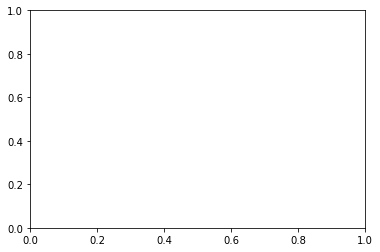

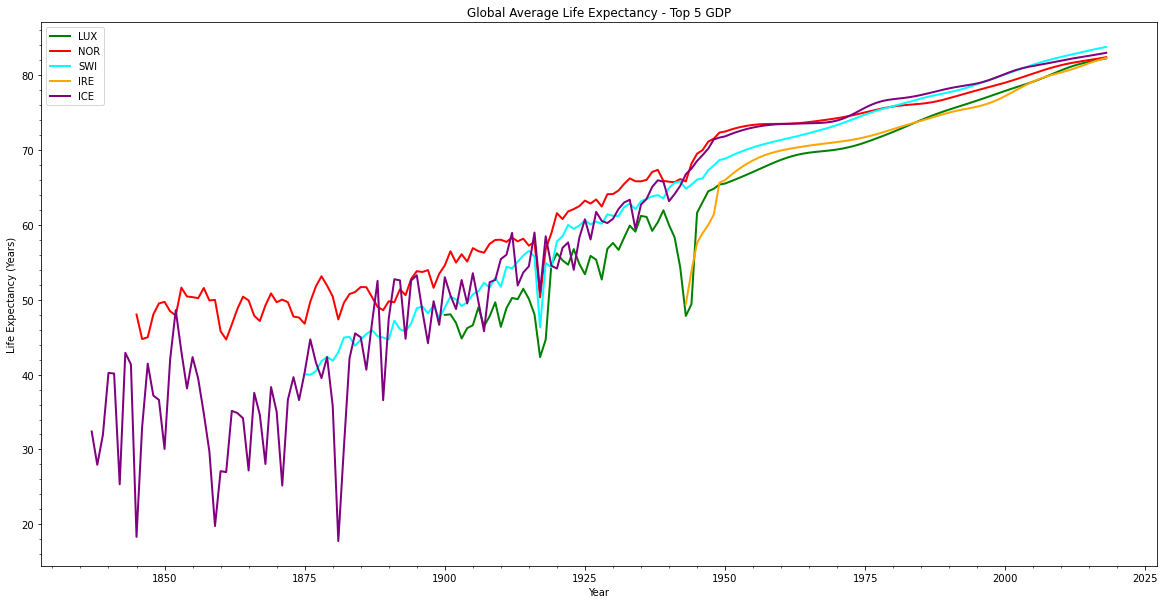

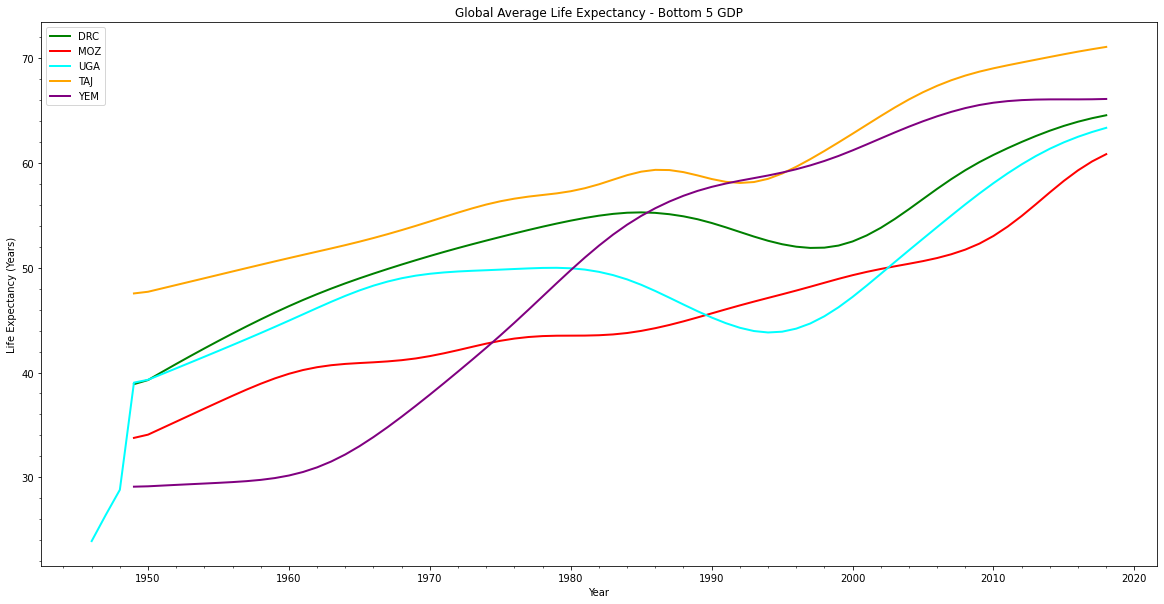

In [312]:
###Plot Data 

##SUBPLOT 1 - HIGHEST GDP
mpy.subplot()

#Input Values
yearLUX_xvalues = yearsLUX
yearNOR_xvalues = yearsNOR
yearSWI_xvalues = yearsSWI
yearIRE_xvalues = yearsIRE
yearICE_xvalues = yearsICE
lux_yvalues = LUX_le
nor_yvalues = NOR_le
swi_yvalues = SWI_le
ire_yvalues = IRE_le
ice_yvalues = ICE_le

#Set Size
mpy.figure(figsize=(20,10))

#Plot Data 
plot_lux = mpy.plot(yearLUX_xvalues, lux_yvalues, linewidth = 2, color= 'green', )
plot_nor = mpy.plot(yearNOR_xvalues, nor_yvalues, linewidth = 2, color= 'red')
plot_swi = mpy.plot(yearSWI_xvalues, swi_yvalues, linewidth = 2, color= 'cyan')
plot_ire = mpy.plot(yearIRE_xvalues, ire_yvalues, linewidth = 2, color= 'orange')
plot_ice = mpy.plot(yearICE_xvalues, ice_yvalues, linewidth = 2, color= 'purple')

mpy.legend(['LUX', 'NOR', 'SWI', 'IRE', 'ICE'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy - Top 5 GDP')

##SUBPLOT 2 - LOWEST GDP
mpy.subplot()

#Input Values 
yearDRC_xvalues = yearsDRC
yearMOZ_xvalues = yearsMOZ
yearUGA_xvalues = yearsUGA
yearTAJ_xvalues = yearsTAJ
yearYEM_xvalues = yearsYEM
DRC_yvalues = DRC_le
MOZ_yvalues = MOZ_le
UGA_yvalues = UGA_le
TAJ_yvalues = TAJ_le
YEM_yvalues = YEM_le

#Set Size
mpy.figure(figsize=(20,10))

#Plot Data 
plot_lux = mpy.plot(yearDRC_xvalues, DRC_yvalues, linewidth = 2, color= 'green', )
plot_nor = mpy.plot(yearMOZ_xvalues, MOZ_yvalues, linewidth = 2, color= 'red')
plot_swi = mpy.plot(yearUGA_xvalues, UGA_yvalues, linewidth = 2, color= 'cyan')
plot_ire = mpy.plot(yearTAJ_xvalues, TAJ_yvalues, linewidth = 2, color= 'orange')
plot_ice = mpy.plot(yearYEM_xvalues, YEM_yvalues, linewidth = 2, color= 'purple')

mpy.legend(['DRC', 'MOZ', 'UGA', 'TAJ', 'YEM'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy - Bottom 5 GDP')